In [2]:
%pylab inline
import types
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FormatStrFormatter

# # set some plotting properties
fontP = FontProperties()
fontP.set_size('small')

import pandas as pd
from locale import *
setlocale(LC_NUMERIC, '')
np.set_printoptions(linewidth=800, threshold='nan', precision=5)


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
raw = pd.read_csv('data/us_infant_mortality_2.tsv', sep='\t', thousands=',', index_col=0)

### One-at-a-time (OAT) sensitivity analysis
Each year we have the number of births and the number of child deaths for every state. The infant mortality rate is the ratio of deaths to births. Each year we can rank the states from worst (hightest rate of mortality) to best (lowest rate). With a sensitivity analysis the aim is to see how many rank positions each state moves with a change of +X and -X in the numerator. 

We'll start with Maine and make a timeseries plot of the number of rank steps changed in each year. 

Let's call the "sensitivity" the area between the +X and -X lines.

In [5]:
def OAT(raw, the_one, how_much=1, sort_cols=None, sort_asc=None):
    
    if sort_cols is not None:
        raw = raw.sort(columns=sort_cols, ascending=sort_asc)
    
    year_set = set()
    for column in raw.columns:
        year_set.add(column.split('_')[0])

    years = list(year_set)
    years.sort()
    years.insert(0, 'states')

    rates = []

    states = list(raw.index)

    for state in states:
        row = [state]
        for year in years[1:]:

            # get the birth value
            try:
                b = raw['{}_Births'.format(year)][state]
            except KeyError:
                continue

            # get death value
            if state == the_one:
                delta = how_much
            else:
                delta = 0
                
            try:
                d = atof(raw['{}_Deaths'.format(year)][state]) + delta
            except AttributeError:
                d = raw['{}_Deaths'.format(year)][state] + delta
                
            d = 0 if d < 0 else d
            
            row.append(1.0*d/b)

        rates.append(row)

    # The completed dataframe of mortality rates
    rates = pd.DataFrame.from_records(rates, columns=years, index='states')

    # Compute numerical data ranks (1 through n) among the states for each year
    ranks = rates.rank(axis=0)
    
    return (rates, ranks)

def cohens_d(means=(), stdevs=(), N_samples=()):
    """
    cohens_d giving the effect size between group 1 and group 2

    see http://en.wikipedia.org/wiki/Effect_size#Cohen.27s_d

    :param means: tuple with (M1,M2)
    :param stdevs: tuple with (V1,V2)
    :param N_samples: tuple with (N1,N2)
    :return: float, effect size
    """

    m = means
    s = stdevs
    n = N_samples
    S = sqrt(((n[0] - 1) * s[0] ** 2 + (n[1] - 1) * s[1] ** 2) / (n[0] + n[1] - 2))

    return (m[0] - m[1]) / S

In [10]:
rates, ranks = OAT(raw, 'Maine', how_much=0)
rates_plus, ranks_plus = OAT(raw, 'Maine', how_much=10)
rates_minus, ranks_minus = OAT(raw, 'Maine', how_much=-10)

In [11]:
rates_plus



1995      1996      1997      1998      1999  \
states                                                                   
Alabama               0.009780  0.010399  0.009456  0.010101  0.009691   
Alaska                0.007517  0.007173  0.007640  0.005944  0.006030   
Arizona               0.007618  0.007660  0.007054  0.007515  0.006704   
Arkansas              0.008643  0.009568  0.008608  0.008924  0.007977   
California            0.006302  0.005914  0.005910  0.005739  0.005392   
Colorado              0.006405  0.006666  0.007040  0.006748  0.006611   
Connecticut           0.007128  0.006386  0.007145  0.006983  0.006003   
Delaware              0.007403  0.007681  0.007900  0.009454  0.007493   
District of Columbia  0.015864  0.015018  0.013750  0.012490  0.015953   
Florida               0.007540  0.007492  0.007111  0.007274  0.007288   
Georgia               0.009547  0.009286  0.008535  0.008393  0.008199   
Hawaii                0.005647  0.005869  0.006669  0.006882  0.007102   
Idaho                 0.006155  0.007195  0.006565  0.007168  0.006693   
Illinois              0.009364  0.008631  0.008424  0.008423  0.008535   
Indiana               0.008390  0.008693  0.008102  0.007554  0.008078   
Iowa                  0.008259  0.007001  0.006110  0.006491  0.005671   
Kansas                0.006882  0.008213  0.007428  0.007053  0.007375   
Kentucky              0.007541  0.007381  0.007105  0.007547  0.007444   
Louisiana             0.009857  0.008987  0.009451  0.009105  0.009280   
Maine                 0.007124  0.005082  0.005706  0.007282  0.005655   
Maryland              0.008868  0.008416  0.008745  0.008559  0.008393   
Massachusetts         0.005181  0.005020  0.005189  0.005196  0.005189   
Michigan              0.008252  0.008119  0.008182  0.008207  0.008046   
Minnesota             0.006781  0.005824  0.005954  0.005905  0.006185   
Mississippi           0.010376  0.010930  0.010570  0.010107  0.010097   
Missouri              0.007367  0.007585  0.007537  0.007697  0.007676   
Montana               0.007090  0.006817  0.006821  0.007689  0.006583   
Nebraska              0.007443  0.008675  0.007547  0.007309  0.006609   
Nevada                0.005747  0.006124  0.006577  0.007143  0.006539   
New Hampshire         0.005319  0.004821  0.004262  0.004366  0.005911   
New Jersey            0.006558  0.006833  0.006330  0.006381  0.006678   
New Mexico            0.006204  0.006427  0.006140  0.007211  0.006804   
New York              0.007680  0.006959  0.006690  0.006243  0.006353   
North Carolina        0.009203  0.009103  0.009242  0.009276  0.009095   
North Dakota          0.007079  0.005391  0.006345  0.008825  0.006807   
Ohio                  0.008672  0.007713  0.007794  0.007932  0.008133   
Oklahoma              0.008320  0.008400  0.007541  0.008471  0.008570   
Oregon                0.006120  0.005429  0.005729  0.005390  0.005707   
Pennsylvania          0.007764  0.007820  0.007634  0.007135  0.007341   
Rhode Island          0.007123  0.005217  0.007065  0.007223  0.005742   
South Carolina        0.009583  0.008432  0.009614  0.009540  0.010228   
South Dakota          0.009165  0.005729  0.007372  0.009234  0.008837   
Tennessee             0.009156  0.008501  0.008593  0.008179  0.007750   
Texas                 0.006516  0.006244  0.006375  0.006366  0.006136   
Utah                  0.005407  0.006106  0.005806  0.005690  0.004861   
Vermont               0.005602  0.006945  0.006206  0.006837  0.005482   
Virginia              0.007831  0.007655  0.007729  0.007620  0.007133   
Washington            0.005788  0.005927  0.005551  0.005724  0.004963   
West Virginia         0.007892  0.007229  0.009600  0.008001  0.007430   
Wisconsin             0.007262  0.007272  0.006551  0.007250  0.006671   
Wyoming               0.007826  0.006522  0.005950  0.007358  0.006853   
United States         0.007565  0.007302  0.007206  0.007186  0.007037   

                          200

In [16]:
base = ranks.loc['Maine'].to_frame(name='base')
plus = ranks_plus.loc['Maine'].to_frame(name='plus')
minus = ranks_minus.loc['Maine'].to_frame(name='minus')

maine = base.merge(plus, left_index=True, right_index=True)
maine = maine.merge(minus, left_index=True, right_index=True)
plus


plus
1995    20
1996     3
1997     4
1998    26
1999     6
2000     7
2001    24
2002     4
2003    16
2004    22
2005    37
2006    28
2007    28
2008    22
2009    27
2010    24
2011    46
2012    47
2013    49
2014    47

In [6]:
maine

base  plus  minus
1995  12.0  20.0    6.0
1996   1.0   3.0    1.0
1997   2.0   4.0    1.0
1998  13.0  26.0    7.0
1999   2.0   6.0    1.0
2000   2.0   7.0    1.0
2001  18.0  24.0    7.0
2002   1.0   4.0    1.0
2003   5.0  16.0    2.0
2004  14.0  22.0    5.0
2005  28.0  37.0   17.0
2006  21.0  28.0   10.0
2007  18.0  28.0   11.0
2008   8.0  22.0    4.0
2009  15.0  27.0    7.0
2010  16.0  24.0    7.0
2011  37.0  46.0   21.0
2012  37.0  47.0   26.0
2013  45.0  49.0   29.0
2014  38.0  47.0   28.0

In [7]:
def area_between_curves(df):
    """df is a dataframe with 'base', 'plus', and 'minus' columns
    and year index values
    """
    running = []
    years = list(df.index)
    for year in years:
        plus = df['plus'][year]
        minus = df['minus'][year]
        running.append(plus - minus)
        
    return sum(running)

def average_change(df):
    """df is a dataframe with 'base', 'plus', and 'minus' columns
    and year index values
    """
    plus = []
    minus = []
    years = list(df.index)
    total = len(years)
    
    for year in years:
        bs = df['base'][year]
        up = df['plus'][year]
        dn = df['minus'][year]
        plus.append(up - bs)
        minus.append(bs - dn)
        
    hi = 1.0*sum(plus)/total
    low = 1.0*sum(minus)/total
        
    return (hi, low)

In [8]:
states = list(raw.index)

S = []

for state in states:
    rates_plus, ranks_plus = OAT(raw, state, how_much=10)
    rates_minus, ranks_minus = OAT(raw, state, how_much=-10)

    base = ranks.loc[state].to_frame(name='base')
    plus = ranks_plus.loc[state].to_frame(name='plus')
    minus = ranks_minus.loc[state].to_frame(name='minus')

    df = base.merge(plus, left_index=True, right_index=True)
    df = df.merge(minus, left_index=True, right_index=True)

    A = area_between_curves(df)
    
    hi, low = average_change(df)
    
    S.append([state, A, hi, low])

In [9]:
sensitivity = pd.DataFrame.from_records(S, columns=['states','sensitivity', 'high', 'low'], index='states')
sensitivity = sensitivity.sort(columns=['high', 'low', 'sensitivity'])
sensitivity

/home/jake/projects/.virtualenvs/BDN-data/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


sensitivity   high    low
states                                         
United States                 1.0   0.05   0.00
Mississippi                   8.0   0.15   0.25
California                    7.0   0.20   0.15
Texas                        17.0   0.30   0.55
Ohio                         20.0   0.35   0.65
Louisiana                    16.0   0.45   0.35
New York                     16.0   0.45   0.35
Massachusetts                18.0   0.55   0.35
Alabama                      19.0   0.60   0.35
North Carolina               26.0   0.60   0.70
Illinois                     36.0   0.60   1.20
Tennessee                    31.0   0.65   0.90
Georgia                      24.0   0.75   0.45
Florida                      27.0   0.75   0.60
Michigan                     39.0   0.90   1.05
Minnesota                    44.0   0.90   1.30
Pennsylvania                 34.0   1.00   0.70
New Jersey                   48.0   1.05   1.35
Washington                   49.0   1.10   1.35
South Carolina               54.0   1.10   1.60
Maryland                     55.0   1.15   1.60
Indiana                      42.0   1.25   0.85
Arizona                      60.0   1.40   1.60
District of Columbia        116.0   1.40   4.40
Virginia                     61.0   1.60   1.45
Missouri                     63.0   1.75   1.40
Oregon                       74.0   1.75   1.95
Wisconsin                    83.0   2.05   2.10
Arkansas                     84.0   2.15   2.05
Oklahoma                     84.0   2.15   2.05
Utah                         71.0   2.20   1.35
Colorado                     69.0   2.30   1.15
Kentucky                     99.0   2.45   2.50
Iowa                        105.0   2.85   2.40
Connecticut                 117.0   3.00   2.85
Nevada                      145.0   3.85   3.40
Kansas                      147.0   4.00   3.35
New Mexico                  177.0   4.15   4.70
West Virginia               211.0   4.90   5.65
Nebraska                    195.0   5.05   4.70
Idaho                       223.0   5.40   5.75
Delaware                    295.0   5.40   9.35
New Hampshire               187.0   6.25   3.10
Hawaii                      277.0   7.25   6.60
Maine                       295.0   7.70   7.05
South Dakota                359.0   9.50   8.45
Alaska                      407.0  10.40   9.95
Rhode Island                406.0  11.30   9.00
Montana                     430.0  11.85   9.65
North Dakota                518.0  13.40  12.50
Wyoming                     648.0  16.30  16.10
Vermont                     526.0  18.95   7.35

In [10]:
mask = rates.index.isin(['Maine'])
rates_all_others = rates[~mask]

mask = rates.index.isin(['Maine'])
rates_maine_only = rates[mask]

In [11]:
def bootstrap(data, n_samples, iterations=100):
    
    means = []
    
    mn = data.min()
    mx = data.max()
    
    for i in xrange(iterations):
        samples = np.random.choice(data, size=n_samples, replace=True)
        mean = means.append(np.mean(samples))
        
    means = np.array(means)
    
    hi = np.percentile(means, 97.5)
    lo = np.percentile(means, 2.5)
    mu = np.mean(means)
    
    return (lo, mu, hi, mn, mx)
    

In [12]:
def m_histogram(data, my_bins=10, title=None, xlim=None, ylim=None):

    if not isinstance(data, types.StringType):

        fig = plt.figure(figsize=(8, 6))
        ax = plt.subplot(111)

        if isinstance(data, types.DictionaryType):
            for k, v in data.iteritems():
                n, bins, patches = ax.hist(v,
                                           bins=my_bins, normed=0,
                                           alpha=0.75, label=k.title(), rwidth=1)

            # only show the legend if there are multiple arrays
            plt.legend(loc='upper right', prop=fontP, scatterpoints=1)

        else:
            n, bins, patches = ax.hist(data,
                                       bins=my_bins, normed=0,
                                       alpha=0.75, rwidth=1)

    else:
        raise TypeError('Input is either an iterable of numbers, or dict of iterables')

    bin_centers = 0.5 * np.diff(bins) + bins[:-1]

    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.set_ylabel('Frequency')
    if title is not None:
        plt.title(title)
    plt.grid(True)
    plt.subplots_adjust(bottom=0.15)
    return n, bins, fig

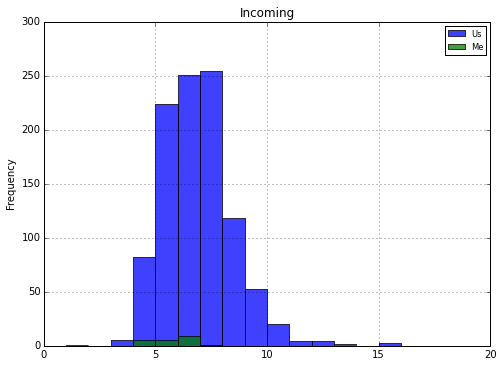

In [13]:
my_bins = np.arange(1, 20, 1)
ylim = (0, 25)
us = (1000*(rates_all_others.values)).flatten()
me = (1000*(rates_maine_only.values)).flatten()
from collections import OrderedDict
source = OrderedDict((('us', us), ('me', me)))
n, bins, h = m_histogram(source, my_bins=my_bins, title='Incoming')
h.savefig('tmp.png')

In [61]:
rates, ranks = OAT(raw, 'none', how_much=0, sort_cols=['2014_Births'], sort_asc=[False])

first_half = [str(i) for i in range(1995, 2005)]
second_half = [str(i) for i in range(2005, 2015)]
rates_first = rates[first_half]
rates_second = rates[second_half]

/home/jake/projects/.virtualenvs/BDN-data/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


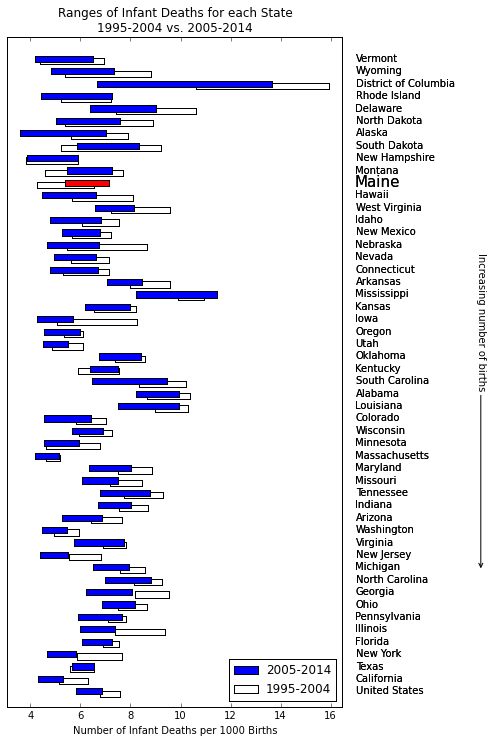

In [62]:
fig = plt.figure(num=None, figsize=(6, 12), dpi=1200, facecolor='w', edgecolor=None)

frame = plt.gca()
ax = fig.add_subplot(111)
# frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

xmin = 999
xmax = 0

for rdx, R in enumerate([rates_first, rates_second]):
    states = R.index
    for idx, state in enumerate(states):
        mask = R.index.isin([state])
        state_rates = R[mask]

        n_samples = 20
        lo, mu, hi, mn, mx = bootstrap((1000*state_rates.values).flatten(), n_samples, iterations=100)

        width = mx - mn

        xmin = mn if mn < xmin else xmin
        xmax = mx if mx > xmax else xmax

        if state == 'Maine':
            sz = 15
            if rdx > 0:
                clr = 'red'
            else:
                clr = "none"
        else:
            sz = 10
            if rdx > 0:
                clr = 'blue'
            else:
                clr = "none"
                
        if rdx > 0:
            offset = 0
        else:
            offset = 0.2

        ax.add_patch(
            matplotlib.patches.Rectangle(
                (mn, idx-offset),   # (x,y)
                width,          # width
                0.5,          # height
                facecolor=clr, 
                
            )
        )

        ax.text(17, idx+0.25, state, ha="left", va="center", size=sz)

ax.annotate('', xy=(17, 0), xycoords='axes fraction', xytext=(1, -0.1), 
            arrowprops=dict(arrowstyle="<->", color='k'))

plt.annotate('Increasing number of births',(22, 10),(22, 30),va='center',ha='center', 
               rotation=270, arrowprops=dict(arrowstyle='->'), annotation_clip=False) 

this_decade = matplotlib.patches.Rectangle((0, 2), 1, 1, facecolor='blue')
last_decade = matplotlib.patches.Rectangle((0, 1), 1, 0.25, facecolor='none')
plt.legend([this_decade, last_decade], ['2005-2014', '1995-2004'], loc='lower right')
plt.ylim(-1,53)
plt.xlim(xmin-0.5, xmax+0.5)
plt.title('Ranges of Infant Deaths for each State\n1995-2004 vs. 2005-2014')
plt.xlabel('Number of Infant Deaths per 1000 Births')
# plt.tight_layout()
plt.savefig('state_ranges.jpg')
plt.show()

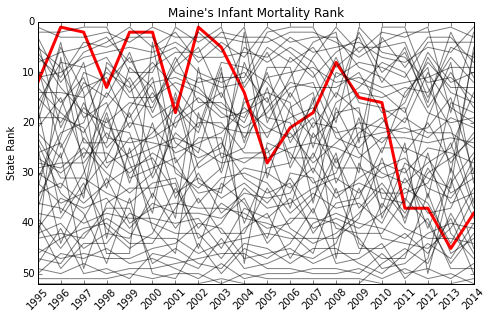

In [117]:
rates, ranks = OAT(raw, 'none', how_much=0)

fig = plt.figure(num=None, figsize=(750/96., 450/96.), dpi=96, facecolor='w', edgecolor=None)
ax = fig.add_subplot(111)

x = range(1995, 2015)

for state in ranks.index:
    
    mask = ranks.index.isin([state])
    st_ranks = ranks[mask]
    y = map(int, list(st_ranks.values.flatten()))
    
    new_england = ['Maine', 'New Hampshire', 'Massachussets', 'Vermont']
    
    if state in ['Maine']:
        ax.plot(x, y, label=state, color='r', linewidth=3)
    else:
        ax.plot(x,y, color='k', alpha=0.5)
plt.ylabel('State Rank')
plt.xlim(1995,2014)
plt.ylim(0,52)
plt.title("Maine's Infant Mortality Rank")
plt.gca().invert_yaxis()

labels = x

plt.xticks(x, labels, rotation=45)

plt.savefig('maines_rank.jpg')
plt.show()

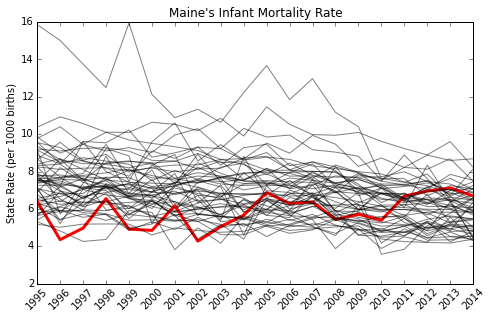

In [116]:
rates, ranks = OAT(raw, 'none', how_much=0)

fig = plt.figure(num=None, figsize=(750/96., 450/96.), dpi=96, facecolor='w', edgecolor=None)
ax = fig.add_subplot(111)

x = range(1995, 2015)

for state in rates.index:
    
    mask = rates.index.isin([state])
    st_rates = rates[mask]
    y = list((1000*st_rates.values).flatten())
    
    new_england = ['Maine', 'New Hampshire', 'Massachussets', 'Vermont']
    
    if state in ['Maine']:
        ax.plot(x, y, label=state, color='r', linewidth=3)
    else:
        ax.plot(x,y, color='k', alpha=0.5)
plt.ylabel('State Rate (per 1000 births)')
plt.xlim(1995,2014)
plt.title("Maine's Infant Mortality Rate")
labels = x

plt.xticks(x, labels, rotation=45)

plt.savefig('maines_rate.jpg')
plt.show()

In [18]:
maine_rates = rates[rates.index.isin(['Maine'])]
mr = maine_rates.values.flatten()
np.std(mr)*1000

0.86819114768608863

In [19]:
raw[['2010_Deaths', '2011_Deaths', '2010_Births', '2011_Births']]

2010_Deaths  2011_Deaths  2010_Births  2011_Births
Alabama                     524.0        488.0      60050.0      59354.0
Alaska                       41.0         44.0      11471.0      11456.0
Arizona                     520.0        511.0      87477.0      85543.0
Arkansas                    279.0        282.0      38540.0      38715.0
California                 2417.0       2403.0     510198.0     502120.0
Colorado                    392.0        358.0      66355.0      65055.0
Connecticut                 200.0        192.0      37708.0      37281.0
Delaware                     85.0        100.0      11364.0      11257.0
District of Columbia         70.0         69.0       9165.0       9295.0
Florida                    1397.0       1379.0     214590.0     213414.0
Georgia                     849.0        908.0     133947.0     132409.0
Hawaii                      118.0        100.0      18988.0      18956.0
Idaho                       111.0        113.0      23198.0      22305.0
Illinois                   1130.0       1058.0     165200.0     161312.0
Indiana                     640.0        638.0      83940.0      83701.0
Iowa                        188.0        181.0      38719.0      38214.0
Kansas                      252.0        247.0      40649.0      39642.0
Kentucky                    380.0        356.0      55784.0      55370.0
Louisiana                   471.0        509.0      62379.0      61888.0
Maine                        70.0         85.0      12970.0      12704.0
Maryland                    504.0        498.0      73801.0      73093.0
Massachusetts               320.0        311.0      72865.0      73166.0
Michigan                    816.0        746.0     114531.0     114008.0
Minnesota                   312.0        325.0      68610.0      68409.0
Mississippi                 385.0        368.0      40036.0      39860.0
Missouri                    505.0        482.0      76759.0      76117.0
Montana                      72.0         72.0      12060.0      12069.0
Nebraska                    136.0        144.0      25918.0      25720.0
Nevada                      198.0        201.0      35934.0      35296.0
New Hampshire                50.0         58.0      12874.0      12851.0
New Jersey                  513.0        538.0     106922.0     105883.0
New Mexico                  156.0        152.0      27850.0      27289.0
New York                   1242.0       1236.0     244375.0     241312.0
North Carolina              867.0        867.0     122350.0     120389.0
North Dakota                 62.0         62.0       9104.0       9527.0
Ohio                       1074.0       1102.0     139128.0     137918.0
Oklahoma                    399.0        380.0      53238.0      52272.0
Oregon                      226.0        206.0      45540.0      45155.0
Pennsylvania               1036.0        929.0     143321.0     143178.0
Rhode Island                 80.0         70.0      11177.0      10960.0
South Carolina              428.0        420.0      58342.0      57393.0
South Dakota                 84.0         72.0      11811.0      11846.0
Tennessee                   626.0        592.0      79495.0      79588.0
Texas                      2373.0       2135.0     386118.0     377445.0
Utah                        254.0        281.0      52258.0      51223.0
Vermont                      26.0         30.0       6223.0       6078.0
Virginia                    703.0        697.0     103002.0     102652.0
Washington                  388.0        396.0      86539.0      86976.0
West Virginia               150.0        136.0      20470.0      20717.0
Wisconsin                   400.0        423.0      68487.0      67810.0
Wyoming                      52.0         49.0       7556.0       7399.0
United States             24571.0      23999.0    3999386.0    3953590.0

In [20]:
# how much id Maine's infant mortality rate worsen in 2011?
print 1000*(85./12704 - 70./12970)

1.29373588343


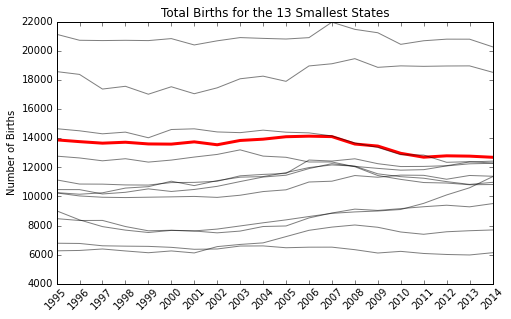

In [115]:
fig = plt.figure(num=None, figsize=(750/96., 450/96.), dpi=96, facecolor='w', edgecolor=None)
ax = fig.add_subplot(111)

x = range(1995, 2015)

births = df

import copy

births = copy.deepcopy(raw)
cols = births.columns
for col in cols:
    if 'Births' not in col:
        births.pop(col)

births
for state in births.index:
    
    mask = births.index.isin([state])
    st_rates = births[mask]
    y = map(int, list(st_rates.values.flatten()))
    
    small_states = [u'West Virginia', u'Hawaii', u'Maine', u'Montana', 
                    u'New Hampshire', u'South Dakota', u'Alaska', u'North Dakota', 
                    u'Delaware', u'Rhode Island', u'District of Columbia', u'Wyoming', 
                    u'Vermont']
    if state not in small_states:
        continue
    
    if state in ['Maine']:
        ax.plot(x, y, label=state, color='r', linewidth=3)
    else:
        ax.plot(x,y, color='k', alpha=0.5)
plt.ylabel('Number of Births')
plt.xlim(1995,2014)
plt.title("Total Births for the 13 Smallest States")
labels = x

plt.xticks(x, labels, rotation=45)

plt.savefig('maines_births.jpg')
plt.show()

732 847.0


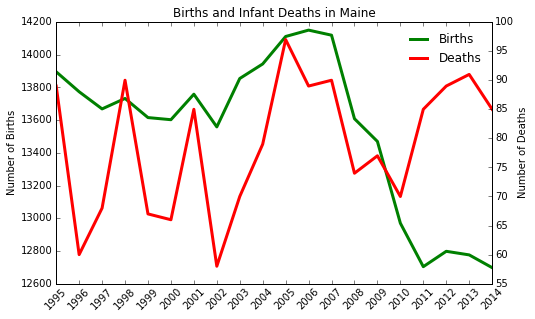

In [114]:
fig = plt.figure(num=None, figsize=(750/96., 450/96.), dpi=96, facecolor='w', edgecolor=None)
ax = fig.add_subplot(111)

x = range(1995, 2015)

births = df

import copy

births = copy.deepcopy(raw)
cols = births.columns
for col in cols:
    if 'Births' not in col:
        births.pop(col)

deaths = copy.deepcopy(raw)
cols = deaths.columns
for col in cols:
    if 'Deaths' not in col:
        deaths.pop(col)
        
maine_births = births[births.index.isin(['Maine'])]
maine_deaths = deaths[deaths.index.isin(['Maine'])]

first_half = ['{}_Deaths'.format(str(i)) for i in range(1995, 2005)]
second_half = ['{}_Deaths'.format(str(i)) for i in range(2005, 2015)]
_first = maine_deaths[first_half]
_second = maine_deaths[second_half]

print _first.values.flatten().sum(), _second.values.flatten().sum()

y = map(int, list(maine_births.values.flatten()))
lns1 = ax.plot(x, y, label='Births', color='g', linewidth=3)

ax2 = ax.twinx()
y = map(int, list(maine_deaths.values.flatten()))
lns2 = ax2.plot(x, y, label='Deaths', color='r', linewidth=3)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, frameon=False)

plt.xlim(1995,2014)
plt.title("Births and Infant Deaths in Maine")
ax.set_ylabel("Number of Births")
ax2.set_ylabel('Number of Deaths')

labels = x

plt.xticks(x, labels, rotation='vertical')
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45 )
plt.savefig('maine_births_deaths.jpg')
plt.show()

## Search for anomalies with simulation
We will use two approaches to investigate the likelihood that Maine would drop to 45th place just based on random chance:
1. synthetic data from one theoretical distribution of U.S. data
  * derive a theoretical gamma distribution from the U.S. IM rate data (resulting ranks are too sensitive to small differences in rate)
  * derive population data from a distribution that matches the birth totals. 
  * 
  * pull 10 samples from the distribution for each of the 51 states+disctrict
  * calculate the rank of each sampled state in each of the 10 years
  * identify how many times we see a drop (negative delta) of > 20 in one state's rank
  * bootstrap the prior two steps 10,000 times and get a distribution of the negative deltas
2. synthetic data from theoretical distributions of each of the states
  * derive a theoretical gamma distribution based on the mean and stdst of each state (this decade only)
  * pull 10 samples from each of the 51 distributions
  * calculate the rank of each sampled state in each of the 10 years
  * identify how many times we see a drop (negative delta) of > 20 in one state's rank
  * bootstrap the prior two steps 10,000 times and get a distribution of the negative deltas
  
I would expect to see that in 1. it's rare, but not impossible to see deltas of > 20 positions. In 2. I expect that it will be much more common. Then I can redo the bar chart with simulated data in white.

In [23]:
from scipy.stats import gamma, beta
from math import sqrt

def beta_params(m,s):
    '''convert mean and std to shape params for the beta distribution'''
    a = ((1-m)/(s**2) - 1/m)*m**2
    b = a*(1/m - 1)
    return a,b

def gamma_params(m,s):
    '''convert mean and std to shape params for the gamma distribution'''
    a = (m/s)**2
    b = (s**2)/m
    return a,b

def to_unity(values):
    '''convert a list of numbers to a list with the same proportions, but sums to unity'''
    s = 1.*sum(values)
    return [i/s for i in values]


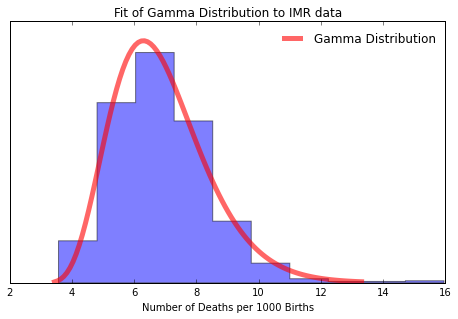

In [118]:
# derive a theoretical gamma distribution from the U.S. IM rate data (this decade only)
rates, ranks = OAT(raw, 'none', how_much=0)

first_half = [str(i) for i in range(1995, 2005)]
second_half = [str(i) for i in range(2005, 2015)]
rates_first = rates[first_half]
rates_second = rates[second_half]

data = 1000*rates.values.flatten()

fit_alpha, fit_loc, fit_beta=gamma.fit(data)

# create the theoretical distribution by fitting to the data
us_gamma = gamma.rvs(fit_alpha, loc=fit_loc, scale=fit_beta, size=10000)

# compare the theoretical distribution to the histogram

fig = plt.figure(num=None, figsize=(750/96., 450/96.), dpi=96, facecolor='w', edgecolor=None)
ax = fig.add_subplot(111)



# frame = plt.gca()
ax.get_yaxis().set_visible(False)

start = gamma.ppf(0.0001, fit_alpha, loc=fit_loc, scale=fit_beta)
stop = gamma.ppf(0.999, fit_alpha, loc=fit_loc, scale=fit_beta)
x = np.linspace(start, stop, 100)
ax.plot(x, gamma.pdf(x, fit_alpha, loc=fit_loc, scale=fit_beta), 
        'r-', lw=5, alpha=0.6, label='Gamma Distribution')
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5)
ax.legend(loc='best', frameon=False)
plt.title('Fit of Gamma Distribution to IMR data')
plt.xlabel('Number of Deaths per 1000 Births')
plt.savefig('gamma_dist.jpg')
plt.show()


In [90]:
rates, ranks = OAT(raw, 'none', how_much=0)
rank_diffs = ranks.diff(axis=1)
rank_diffs['min_diff'] = rank_diffs.min(axis=1)
rank_diffs['max_diff'] = rank_diffs.max(axis=1)
rank_diffs['highest'] = ranks.min(axis=1)
rank_diffs['lowest'] = ranks.max(axis=1)
def hi_low_diff(row):
    hi = row.max() - row.min()
    return hi - low
rank_diffs['total_diff'] = ranks.apply(hi_low_diff, axis=1)
real_diffs = rank_diffs[['min_diff', 'max_diff', 'highest', 'lowest', 'total_diff']]
real_diffs[['total_diff']]

total_diff
states                          
Alabama                      6.0
Alaska                      38.0
Arizona                     18.0
Arkansas                    11.0
California                  10.0
Colorado                    19.0
Connecticut                 20.0
Delaware                    27.0
District of Columbia        14.0
Florida                     10.0
Georgia                     22.0
Hawaii                      33.0
Idaho                       27.0
Illinois                    22.0
Indiana                     21.0
Iowa                        35.0
Kansas                      25.0
Kentucky                    31.0
Louisiana                    6.0
Maine                       44.0
Maryland                    16.0
Massachusetts                6.0
Michigan                    12.0
Minnesota                   19.0
Mississippi                  2.0
Missouri                    20.0
Montana                     31.0
Nebraska                    37.0
Nevada                      18.0
New Hampshire               17.0
New Jersey                  17.0
New Mexico                  25.0
New York                    22.0
North Carolina              12.0
North Dakota                41.0
Ohio                        14.0
Oklahoma                    18.0
Oregon                      14.0
Pennsylvania                21.0
Rhode Island                35.0
South Carolina              18.0
South Dakota                46.0
Tennessee                   13.0
Texas                       17.0
Utah                        14.0
Vermont                     23.0
Virginia                    15.0
Washington                  14.0
West Virginia               23.0
Wisconsin                   12.0
Wyoming                     40.0
United States                7.0

## Strange differences
Above we have two tables, the first with simulated data, and the second derived from the original data. Each table shows the greatest rank increase (negative), the greatest rank drop, the highest and lowest overall rank, and the difference between the high and low. The total difference column from the genuine data shows that most of the states maintain their position quite well. I.e., if they are good, they stay good, and if they have a bad record, they tend to stay at the bottom (we're looking at you, D.C.). It's interesting to note that Maine and South Dakota, have the widest spread with highs to lows of 1st to 45th and 4th to 50th respectively. 

The fact that states' rankings tend to remain consistent is interesting when we look at it through the magical "lens of randomness." 

The table of simulated data shows that randomized data, that is, if states' variability in infant mortality was only due to random noise then it would be much more common for states to look like Maine and South Dakota with spreads in the 30s, 40s, and even 50s. What is strange here is that in the real data *that doesn't happen*. This begs the question, why are Maine's and South Dakota's infant mortality rates uncontrolled? 

In [157]:
from random import choice
from string import ascii_uppercase

us_rv = gamma.rvs(fit_alpha, loc=fit_loc, scale=fit_beta, size=10000)
us_p = [gamma.cdf(i, fit_alpha, loc=fit_loc, scale=fit_beta) for i in us_rv]
us_p = to_unity(us_p)

records = []

for s in range(51):
    name = ''.join(choice(ascii_uppercase) for i in range(4))
    values = np.random.choice(us_rv, replace=True, size=10, p=us_p)
    row = [name]
    row.extend(values)
    records.append(row)
    
    
years = ['states']
years.extend(second_half)
test_1 = pd.DataFrame.from_records(records, columns=years, index='states')


In [158]:
ranks_1 = test_1.rank(axis=0)
ranks_1.diff(axis=1)

rank_diffs = ranks_1.diff(axis=1)
rank_diffs['min_diff'] = rank_diffs.min(axis=1)
rank_diffs['max_diff'] = rank_diffs.max(axis=1)
rank_diffs['highest'] = ranks_1.min(axis=1)
rank_diffs['lowest'] = ranks_1.max(axis=1)
def hi_low_diff(row):
    hi = row.max() - row.min()
    return hi - low
rank_diffs['total_diff'] = ranks_1.apply(hi_low_diff, axis=1)
simm_diffs = rank_diffs[['min_diff', 'max_diff', 'highest', 'lowest', 'total_diff']]
simm_diffs[['total_diff']]

total_diff
states            
JCQX          48.0
HFMG          45.0
VWZE          43.0
LBBT          47.0
OSFT          41.0
QXZW          48.0
VPRL          50.0
JHCQ          46.0
GHVG          46.0
ZXZQ          35.0
OINP          42.0
DZRU          41.0
YTGQ          39.0
YLWE          49.0
KZTE          40.0
PUWF          37.0
TOGW          33.0
TWLA          34.0
RJLF          46.0
HNXD          47.0
CSTN          48.0
YXPQ          45.0
FJRH          41.0
HOIX          32.0
LERC          46.0
EDGC          43.0
QCIU          40.0
CSMJ          36.0
RZIX          50.0
WELA          41.0
CUKB          33.0
WXCT          42.0
UJQO          41.0
CJEB          45.0
LFQG          37.0
PFKK          43.0
LNXU          27.0
FSBW          42.0
ZAWX          46.0
CTWN          42.5
VHDB          37.0
CMMP          40.0
DCQF          36.0
QZOM          48.0
DKEV          45.0
FCUH          48.0
FUPO          43.0
DFYL          46.0
ZHRP          43.0
HMBZ          47.0
QTYX          44.0

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51]


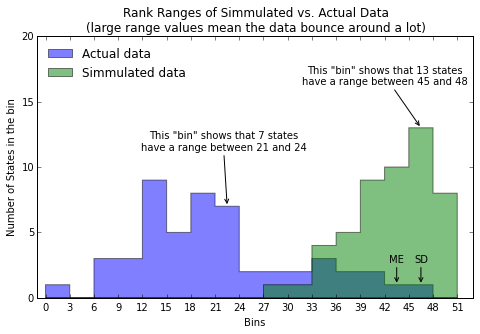

In [161]:
# show the distribution of rank ranges for the simulated random data and the actual data

# simm_diffs
mask = real_diffs.index.isin(['United States'])
real_diffs_ = real_diffs[~mask]
real_ranges = real_diffs_[['total_diff']]

simm_ranges = simm_diffs[['total_diff']]

bins = range(0, 52, 3)

fig = plt.figure(num=None, figsize=(750/96., 450/96.), dpi=96, facecolor='w', edgecolor=None)
ax = fig.add_subplot(111)

ax.hist(real_ranges.values.flatten(), normed=False, histtype='stepfilled', 
        label='Actual data', alpha=0.5, color='b', bins=bins)

ax.hist(simm_ranges.values.flatten(), normed=False, histtype='stepfilled', 
        label='Simmulated data', alpha=0.5, color='g', bins=bins)

# fit_alpha, fit_loc, fit_beta=gamma.fit(data)

# # create the theoretical distribution by fitting to the data
# us_gamma = gamma.rvs(fit_alpha, loc=fit_loc, scale=fit_beta, size=10000)

# # compare the theoretical distribution to the histogram

# start = gamma.ppf(0.001, fit_alpha, loc=fit_loc, scale=fit_beta)
# stop = gamma.ppf(0.999, fit_alpha, loc=fit_loc, scale=fit_beta)
# x = np.linspace(start, stop, 100)
# ax.plot(x, gamma.pdf(x, fit_alpha, loc=fit_loc, scale=fit_beta), 
#         'r-', lw=5, alpha=0.6, label='theoretical dist.')

plt.annotate('This "bin" shows that 7 states \nhave a range between 21 and 24',(22.5, 7),(22, 12),va='center',ha='center', 
               rotation=0, arrowprops=dict(arrowstyle='->'), annotation_clip=False) 

plt.annotate('This "bin" shows that 13 states \nhave a range between 45 and 48',(46.5, 13),(42, 17),va='center',ha='center', 
               rotation=0, arrowprops=dict(arrowstyle='->'), annotation_clip=False) 

plt.annotate('ME',(43.5, 1),(43.5, 3),va='center',ha='center', 
               rotation=0, arrowprops=dict(arrowstyle='->'), annotation_clip=False) 

plt.annotate('SD',(46.5, 1),(46.5, 3),va='center',ha='center', 
               rotation=0, arrowprops=dict(arrowstyle='->'), annotation_clip=False) 

print bins
plt.xlim(-1, 53)
plt.ylim(0, 20)
plt.title('Rank Ranges of Simmulated vs. Actual Data\n(large range values mean the data bounce around a lot)')
plt.xlabel('Bins')
plt.ylabel('Number of States in the bin')
ax.legend(loc='upper left', frameon=False)
ax.set_xticks(bins)
plt.savefig('rank_ranges.jpg')
plt.show()

784 827.0


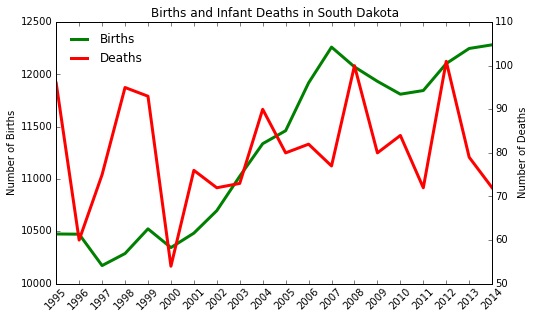

In [120]:
fig = plt.figure(num=None, figsize=(750/96., 450/96.), dpi=96, facecolor='w', edgecolor=None)
ax = fig.add_subplot(111)

x = range(1995, 2015)

births = df

import copy

births = copy.deepcopy(raw)
cols = births.columns
for col in cols:
    if 'Births' not in col:
        births.pop(col)

deaths = copy.deepcopy(raw)
cols = deaths.columns
for col in cols:
    if 'Deaths' not in col:
        deaths.pop(col)
        
maine_births = births[births.index.isin(['South Dakota'])]
maine_deaths = deaths[deaths.index.isin(['South Dakota'])]

first_half = ['{}_Deaths'.format(str(i)) for i in range(1995, 2005)]
second_half = ['{}_Deaths'.format(str(i)) for i in range(2005, 2015)]
_first = maine_deaths[first_half]
_second = maine_deaths[second_half]

print _first.values.flatten().sum(), _second.values.flatten().sum()


y = map(int, list(maine_births.values.flatten()))
lns1 = ax.plot(x, y, label='Births', color='g', linewidth=3)

ax2 = ax.twinx()
y = map(int, list(maine_deaths.values.flatten()))
lns2 = ax2.plot(x, y, label='Deaths', color='r', linewidth=3)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, frameon=False)

plt.xlim(1995,2014)
plt.title("Births and Infant Deaths in South Dakota")
ax.set_ylabel("Number of Births")
ax2.set_ylabel('Number of Deaths')

labels = x

plt.xticks(x, labels, rotation=45)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45 )
plt.savefig('south_dakota_births_deaths.jpg')
plt.show()

In [30]:
maine_deaths

1995_Deaths  1996_Deaths  1997_Deaths  1998_Deaths  1999_Deaths  \
South Dakota           96           60           75           95           93   

              2000_Deaths  2001_Deaths  2002_Deaths  2003_Deaths  2004_Deaths  \
South Dakota           54           76           72           73           90   

              2005_Deaths  2006_Deaths  2007_Deaths  2008_Deaths  2009_Deaths  \
South Dakota         80.0           82           77        100.0         80.0   

              2010_Deaths  2011_Deaths  2012_Deaths  2013_Deaths  2014_Deaths  
South Dakota         84.0         72.0        101.0           79           72

2012 was a bad year for South Dakota with a jump from 72 infant deaths in 2011 (23rd place) to 101 in 2012 (49th place, ahead of Alabama and Mississippi). We also see here, like Maine, that South Dakota has lost more babies in this decade than in the last. But, in contrast to Maine, they have seen an increase in numbers of births. 

What we have seen so far is that Maine far from the worst state in the union for infant mortality. However, there is an unsettling trend in decreasing births while the numbers of infant deaths has increased. Maine has also bucked the common trend for states to keeps it's position year-over-year among other states in the U.S.. It is not completely out of the question for Maine's rank changes to be due to simple randomness, but it's suspicious that Maine would be unique in both worstening IMR and uncontrolled variability.

In [31]:
ranks

1995  1996  1997  1998  1999  2000  2001  2002  2003  \
states                                                                       
Alabama               49.0  50.0  48.0  50.0  49.0  49.0  48.0  47.0  46.0   
Alaska                26.0  24.0  35.0   8.0  12.0  28.0  39.0   9.0  27.0   
Arizona               30.0  33.0  23.0  29.0  23.0  24.0  25.0  20.0  20.0   
Arkansas              40.0  49.0  44.0  44.0  38.0  40.0  42.0  42.0  47.0   
California            11.0  10.0   7.0   6.0   5.0   6.0   4.0   7.0   7.0   
Colorado              13.0  18.0  22.0  14.0  19.0  12.0  11.0  13.0  18.0   
Connecticut           21.0  15.0  27.0  17.0  11.0  19.0  16.0  21.0   8.0   
Delaware              24.0  34.0  38.0  48.0  35.0  50.0  51.0  44.0  50.0   
District of Columbia  52.0  52.0  52.0  52.0  52.0  52.0  52.0  52.0  51.0   
Florida               27.0  30.0  26.0  26.0  30.0  26.0  29.0  34.0  33.0   
Georgia               47.0  48.0  42.0  39.0  42.0  43.0  43.0  46.0  44.0   
Hawaii                 5.0   9.0  19.0  16.0  28.0  38.0  15.0  32.0  34.0   
Idaho                  9.0  25.0  17.0  21.0  22.0  35.0  19.0  15.0  19.0   
Illinois              46.0  43.0  41.0  40.0  44.0  44.0  37.0  30.0  38.0   
Indiana               39.0  45.0  39.0  31.0  40.0  37.0  36.0  37.0  37.0   
Iowa                  37.0  23.0  10.0  12.0   7.0  16.0   9.0   5.0  15.0   
Kansas                17.0  38.0  30.0  18.0  32.0  20.0  35.0  28.0  24.0   
Kentucky              28.0  29.0  25.0  30.0  34.0  30.0  14.0  29.0  26.0   
Louisiana             50.0  46.0  47.0  45.0  48.0  47.0  49.0  51.0  48.0   
Maine                 12.0   1.0   2.0  13.0   2.0   2.0  18.0   1.0   5.0   
Maryland              42.0  40.0  45.0  42.0  43.0  34.0  41.0  35.0  42.0   
Massachusetts          1.0   3.0   3.0   2.0   4.0   1.0   3.0   3.0   3.0   
Michigan              36.0  37.0  40.0  38.0  39.0  39.0  40.0  39.0  45.0   
Minnesota             16.0   8.0   9.0   7.0  14.0   9.0   6.0   6.0   2.0   
Mississippi           51.0  51.0  51.0  51.0  50.0  51.0  50.0  50.0  52.0   
Missouri              23.0  31.0  31.0  34.0  36.0  32.0  31.0  43.0  40.0   
Montana               19.0  19.0  21.0  33.0  17.0  11.0  30.0  33.0  29.0   
Nebraska              25.0  44.0  33.0  27.0  18.0  31.0  22.0  26.0  10.0   
Nevada                 6.0  13.0  18.0  20.0  16.0  17.0   7.0  16.0  16.0   
New Hampshire          2.0   2.0   1.0   1.0  10.0  10.0   1.0   4.0   1.0   
New Jersey            15.0  20.0  13.0  11.0  21.0  14.0  21.0  11.0  13.0   
New Mexico            10.0  16.0  11.0  23.0  24.0  23.0  20.0  17.0  14.0   
New York              31.0  22.0  20.0   9.0  15.0  15.0  12.0  14.0  17.0   
North Carolina        45.0  47.0  46.0  47.0  47.0  45.0  44.0  40.0  41.0   
North Dakota          18.0   5.0  14.0  43.0  25.0  41.0  46.0  18.0  30.0   
Ohio                  41.0  35.0  37.0  35.0  41.0  36.0  38.0  38.0  39.0   
Oklahoma              38.0  39.0  32.0  41.0  45.0  42.0  33.0  41.0  36.0   
Oregon                 8.0   6.0   5.0   3.0   8.0   7.0   5.0  10.0  12.0   
Pennsylvania          32.0  36.0  34.0  19.0  31.0  29.0  27.0  36.0  31.0   
Rhode Island          20.0   4.0  24.0  24.0   9.0  13.0  24.0  27.0  25.0   
South Carolina        48.0  41.0  50.0  49.0  51.0  46.0  47.0  49.0  43.0   
South Dakota          44.0   7.0  29.0  46.0  46.0   4.0  28.0  23.0  23.0   
Tennessee             43.0  42.0  43.0  37.0  37.0  48.0  45.0  48.0  49.0   
Texas                 14.0  14.0  15.0  10.0  13.0   8.0  13.0  19.0  21.0   
Utah                   3.0  12.0   6.0   4.0   1.0   5.0   2.0   8.0   4.0   
Vermont                4.0  21.0  12.0  15.0   6.0  18.0   8.0   2.0   6.0   
Virginia              34.0  32.0  36.0  32.0  29.0  27.0  34.0  31.0  35.0   
Washington             7.0  11.0   4.0   5.0   3.0   3.0  10.0  12.0  11.0   
West Virginia         35.0  26.0  49.0  36.0  33.0  33.0  32.0  45.0  32.0   
Wisconsin             22.0  27.0  16.0  25.0